In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv("Retail Sales Dataset.csv")

In [6]:
df.dtypes

Order ID              int64
Date                 object
Customer ID          object
Gender               object
Age                   int64
Product Category     object
Payment Method       object
City                 object
Store Type           object
Quantity              int64
Price per Unit        int64
Total Amount          int64
Total Price           int64
Delivery Status      object
High Value Order     object
Sales Rep E-mail     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           1000 non-null   int64 
 1   Date               1000 non-null   object
 2   Customer ID        1000 non-null   object
 3   Gender             1000 non-null   object
 4   Age                1000 non-null   int64 
 5   Product Category   1000 non-null   object
 6   Payment Method     1000 non-null   object
 7   City               1000 non-null   object
 8   Store Type         1000 non-null   object
 9   Quantity           1000 non-null   int64 
 10  Price per Unit     1000 non-null   int64 
 11  Total Amount       1000 non-null   int64 
 12  Total Price        1000 non-null   int64 
 13  Delivery Status    1000 non-null   object
 14  High Value Order   1000 non-null   object
 15  Sales Rep E-mail   1000 non-null   object
dtypes: int64(6), object(10)
memory usage: 125.1

In [10]:
df.sort_values( by = "Total Amount", ascending = False).head(10)

,Order ID,Date,Customer ID,Gender,Age,Product Category,Payment Method,City,Store Type,Quantity,Price per Unit,Total Amount,Total Price,Delivery Status,High Value Order,Sales Rep E-mail
38,15,16/01/2023,CUST015,Female,42,Electronics,Credit Card,San Francisco,Warehouse Club,10,500,5000,5000,Completed,Yes,sanfranciscorep@gmail.com
811,869,25/10/2023,CUST869,Male,37,Beauty,Credit Card,Los Angeles,Specialty Store,9,500,4500,4500,Completed,Yes,losangelesrep@gmail.com
883,74,22/11/2023,CUST074,Female,18,Beauty,Credit Card,Miami,Supermarket,8,500,4000,4000,Completed,Yes,miamirep@gmail.com
377,118,16/05/2023,CUST118,Female,30,Electronics,Credit Card,San Francisco,Convenience Store,7,500,3500,3500,Completed,Yes,sanfranciscorep@gmail.com
401,31,23/05/2023,CUST031,Male,44,Electronics,Debit Card,Boston,Specialty Store,10,300,3000,3000,Completed,Yes,bostonrep@gmail.com
252,886,09/04/2023,CUST886,Male,37,Electronics,Debit Card,Boston,Department Store,9,300,2700,2700,Completed,Yes,bostonrep@gmail.com
245,891,05/04/2023,CUST891,Male,41,Electronics,Credit Card,Los Angeles,Supermarket,9,300,2700,2700,Completed,Yes,losangelesrep@gmail.com
82,107,03/02/2023,CUST107,Female,21,Clothing,Mobile Payment,Dallas,Pharmacy,8,300,2400,2400,Pending,Yes,dallasrep@gmail.com
383,155,17/05/2023,CUST155,Male,31,Electronics,Credit Card,Seattle,Warehouse Club,4,500,2000,2000,Completed,Yes,seattlerep@gmail.com
283,572,20/04/2023,CUST572,Male,31,Clothing,Credit Card,Dallas,Supermarket,4,500,2000,2000,Pending,Yes,dallasrep@gmail.com


In [14]:
top10 = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending = False).head(10)

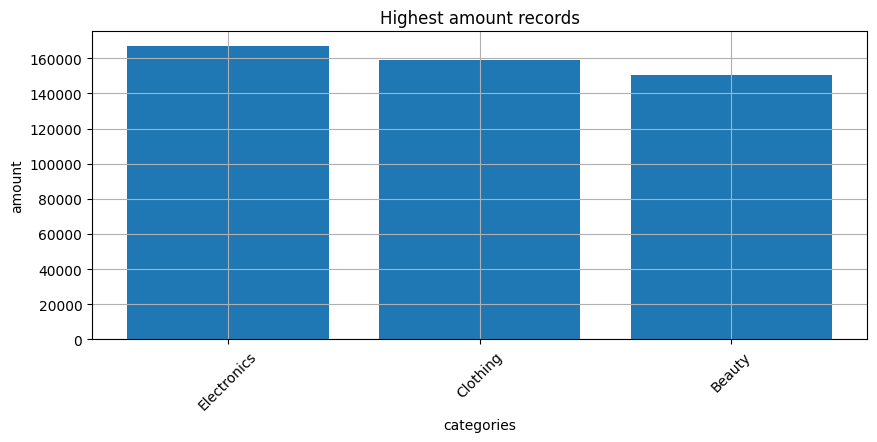

In [19]:
plt.figure(figsize = (10,4))
plt.bar(top10.index, top10.values)
plt.xlabel("categories")
plt.ylabel("amount")
plt.title("Highest amount records")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [ ]:
# CONCLUSIONS:
# 1. The electronics has the largest number of sales among three.
# 2. Beauty products contiributes least to the total sales.

In [17]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst = True)

In [21]:
monthly_sales = (df.groupby(df["Date"].dt.to_period("M"))["Total Amount"].sum())

In [23]:
monthly_sales.index = monthly_sales.index.to_timestamp()

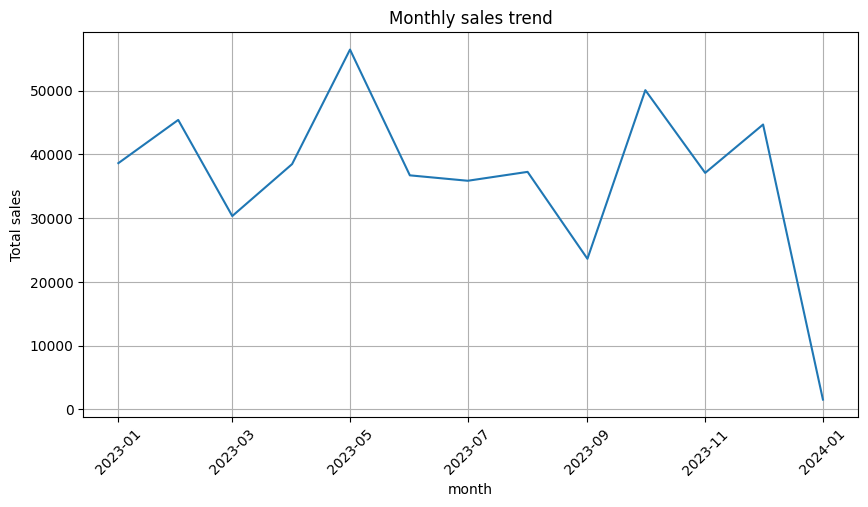

Text(10, 8, 'Peak: 56450')

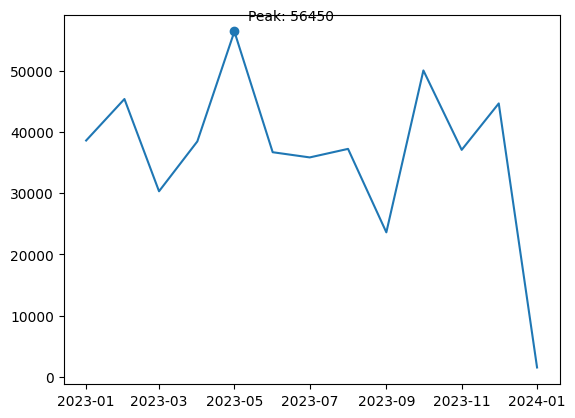

In [47]:
plt.figure(figsize = (10,5))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel("month")
plt.ylabel("Total sales")
plt.title("Monthly sales trend")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

peak_date = monthly_sales.idxmax()
peak_value = monthly_sales.max()

plt.plot(monthly_sales.index, monthly_sales.values)
plt.scatter(peak_date, peak_value)
plt.annotate(
    f'Peak: {peak_value}',
    (peak_date, peak_value),
    textcoords="offset points",
    xytext=(10,8)
)

In [ ]:
# CONCLUSION:
# 1. There is sharp increase in the sales during march to may and september to october.
# 2. There is very less sales in the end of the year.

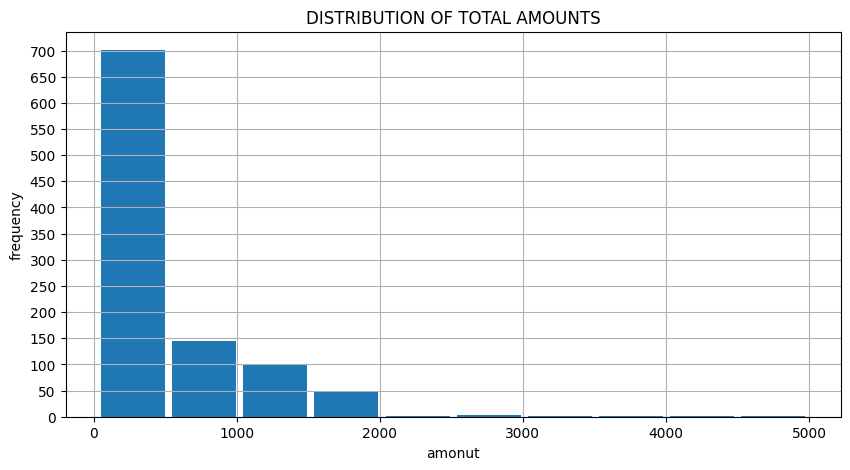

In [53]:
plt.figure(figsize = (10,5))
plt.hist(df["Total Amount"], bins = 10, rwidth = 0.9)
plt.xlabel("amonut")
plt.ylabel("frequency")
plt.yticks(np.arange(0,701,50))
plt.title("DISTRIBUTION OF TOTAL AMOUNTS")
plt.grid()
plt.show()

In [ ]:
# CONCLUSIONS:
# 1. Expensive produts are bought by very few peoples hence contributes less in total sales
# 2. cheaper products are bought by very large number of peoples and the contribution is huge in total sales.

Text(0.5, 1.0, 'TOATL AMOUNT PER QUANTITY')

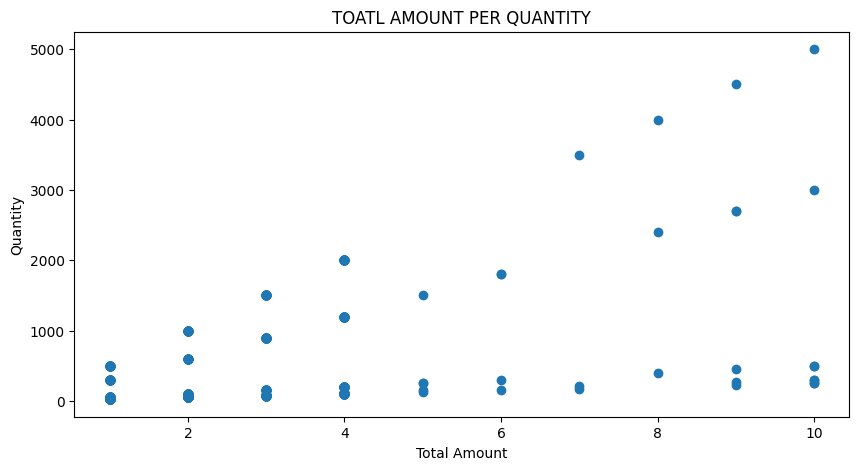

In [41]:
plt.figure(figsize = (10,5))
plt.scatter(df["Quantity"], df["Total Amount"])
plt.xlabel("Total Amount")
plt.ylabel("Quantity")
plt.title("TOATL AMOUNT PER QUANTITY")

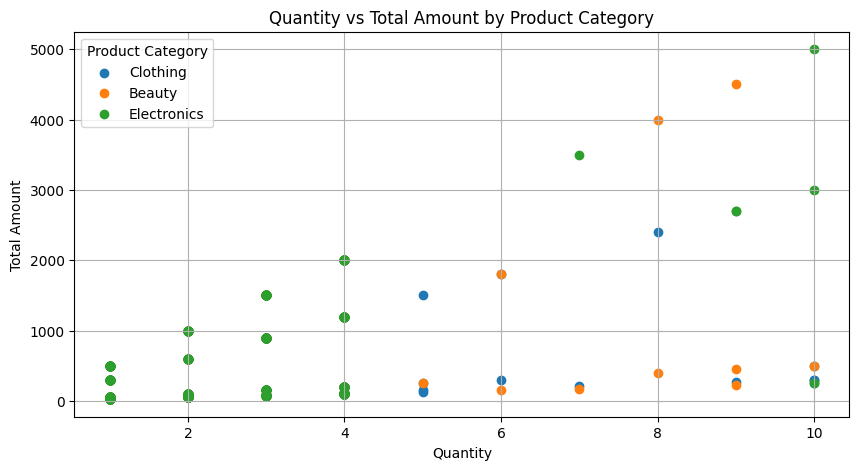

In [48]:
import matplotlib.pyplot as plt

categories = df['Product Category'].unique()

plt.figure(figsize=(10,5))

for cat in categories:
    subset = df[df['Product Category'] == cat]
    plt.scatter(subset['Quantity'], subset['Total Amount'], label=cat)

plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Quantity vs Total Amount by Product Category')
plt.legend(title='Product Category')
plt.grid()
plt.show()

In [ ]:
# CONCLUSION:
# 1. Electronics products having less price has maximum sales among all three categories
# 2. Beauty products are expensive and have less sales among all.